# Шифт конкурс "Займы"

### Разработчик модели: Мартюшева Анна Васильевна, г. Москва
#### martyusheva.a@inbox.ru

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('X_train.csv')

In [3]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
acc_now_delinq,0.0,0.0,0.0,0.0,0.0
addr_state,UT,CA,NV,AZ,OH
annual_inc,80000.0,82000.0,46080.0,30000.0,70000.0
chargeoff_within_12_mths,0.0,0.0,0.0,0.0,0.0
collections_12_mths_ex_med,0.0,0.0,0.0,0.0,0.0
delinq_2yrs,0.0,0.0,1.0,0.0,0.0
dti,30.49,7.0,17.32,7.8,13.36
earliest_cr_line,Oct-1996,Mar-1993,Nov-2000,Jan-2010,Jan-2002
emp_length,4 years,10+ years,3 years,< 1 year,< 1 year


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   index                       1199861 non-null  int64  
 1   acc_now_delinq              1199861 non-null  float64
 2   addr_state                  1199861 non-null  object 
 3   annual_inc                  1199861 non-null  float64
 4   chargeoff_within_12_mths    1199824 non-null  float64
 5   collections_12_mths_ex_med  1199824 non-null  float64
 6   delinq_2yrs                 1199861 non-null  float64
 7   dti                         1199861 non-null  float64
 8   earliest_cr_line            1199861 non-null  object 
 9   emp_length                  1128114 non-null  object 
 10  fico_range_high             1199861 non-null  float64
 11  fico_range_low              1199861 non-null  float64
 12  funded_amnt                 1199861 non-null  float64
 1

In [5]:
df = df.drop('index', axis = 1)

In [6]:
df.isna().sum()

acc_now_delinq                     0
addr_state                         0
annual_inc                         0
chargeoff_within_12_mths          37
collections_12_mths_ex_med        37
delinq_2yrs                        0
dti                                0
earliest_cr_line                   0
emp_length                     71747
fico_range_high                    0
fico_range_low                     0
funded_amnt                        0
home_ownership                     0
inq_last_12m                  567215
installment                        0
int_rate                           0
issue_d                            0
loan_amnt                          0
mort_acc                       31541
mths_since_last_delinq        607443
mths_since_recent_bc_dlq      917196
mths_since_recent_inq         149781
num_accts_ever_120_pd          45009
num_actv_bc_tl                 45009
num_rev_accts                  45010
num_sats                       37295
num_tl_120dpd_2m               90608
n

В нашем датафрейме присутствует большое количество пропущенных значений. Избавимся от них.

In [7]:
# лишь у одного объекта не хватает zip-кода штата. Предположим, что предоставленный zip-код совпадает с заявленным штатом.
df[df['zip_code'].isna()]

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
968046,0.0,AL,40000.0,0.0,0.0,0.0,22.86,Jul-2005,10+ years,674.0,...,1.0,1.0,debt_consolidation,68.5%,0.0,36 months,Debt consolidation,18.0,Verified,NaN


In [8]:
df.loc[df['zip_code'].isna(), 'zip_code'] = '350xx'

In [9]:
df['title'].nunique()
#скорее всего, данная колонка просто не будет необходима для построенной модели. 
#В ней 13800 пропущенных значений, а её назначение - это название займа, предоставленное клиентом.

43858

In [10]:
df['emp_length'].fillna(value = 'No info', inplace = True)
#Заменим пропущенные значения в данной колонке на подходящее по смыслу значение - "нет информации".   

In [11]:
df['mths_since_recent_bc_dlq'].isna().sum()/df.shape[0]
#Заметим, что в данном столбце около 76-77% значений пропущены. Следует в дальнейшем удалить её.

0.7644185451481463

В следующих столбцах всего по 37 пропущенных значений. Ввиду большого объёма данных можно без ущерба для качества модели заполнить пропуски константами - медианными значениемя этих столбцов (исключая нули - иначе медианой будет 0 в обоих случаях)

In [12]:
val1 = df[df['collections_12_mths_ex_med'] != 0]['collections_12_mths_ex_med'].median()

val2 = df[df['chargeoff_within_12_mths'] != 0]['chargeoff_within_12_mths'].median()

In [13]:
df['collections_12_mths_ex_med'].fillna(value = val1, inplace = True)

df['chargeoff_within_12_mths'].fillna(value = val2, inplace = True)

In [14]:
df['revol_util'].nunique()

1316

Имеем 1316 различных значений некоторого коэффициента. В данном случае имеет смысл заменить тип данных на числовой, а затем заполнить медианным значением пропуски (841 объект)

In [15]:
def make_ints(x):
    if not(x is None):
        if type(x) == str:
            return float(x[:len(x) - 1])


In [16]:
df['revol_util'] = df['revol_util'].apply(make_ints)
val3 = df['revol_util'].median()
df['revol_util'].fillna(value = val3, inplace = True)

Аналогичным образом поступим с процентной ставкой - изменим тип данных.

In [17]:
df['int_rate'].nunique()

669

In [18]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:len(x)-1]))

Удалим название займа и колонку с 76% пропущенных значений.

In [19]:
df = df.drop(['mths_since_recent_bc_dlq', 'title'], axis = 1)

Остальные пропуски заполним значением -999 (т.к. в дальнейшем планируется построение модели на основе деревьев решений, таким образом можно поступить)

In [20]:
df.fillna(value = -999, inplace = True)

In [21]:
df.isna().sum()

acc_now_delinq                0
addr_state                    0
annual_inc                    0
chargeoff_within_12_mths      0
collections_12_mths_ex_med    0
delinq_2yrs                   0
dti                           0
earliest_cr_line              0
emp_length                    0
fico_range_high               0
fico_range_low                0
funded_amnt                   0
home_ownership                0
inq_last_12m                  0
installment                   0
int_rate                      0
issue_d                       0
loan_amnt                     0
mort_acc                      0
mths_since_last_delinq        0
mths_since_recent_inq         0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_rev_accts                 0
num_sats                      0
num_tl_120dpd_2m              0
num_tl_30dpd                  0
num_tl_90g_dpd_24m            0
num_tl_op_past_12m            0
open_acc                      0
open_il_24m                   0
open_rv_

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на тепловую карту корреляции данных.

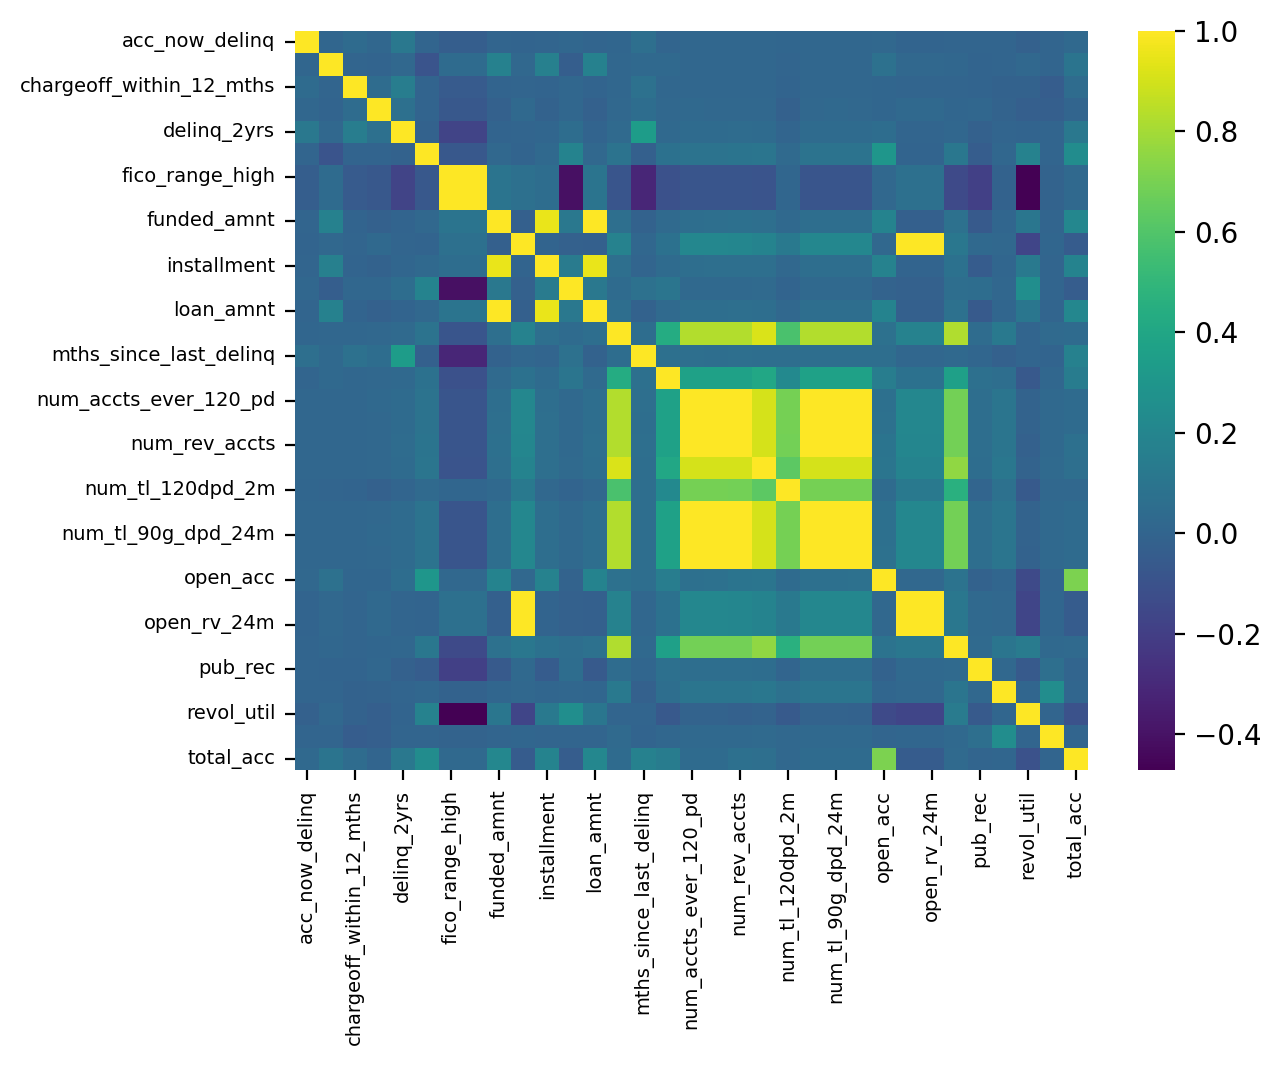

In [23]:
plt.figure(dpi = 200);
ax = sns.heatmap(data = df.corr(), cmap = 'viridis');
ax.tick_params(axis='both', which='major', labelsize=7)

Наблюдаем сильную корреляцию некоторых признаков между собой. Выясним, что это за признаки:

In [24]:
corrs = df.corr()
for col in corrs.columns:
    if any((abs(corrs[col]) > 0.8) & (abs(corrs[col]) < 1.0)):
        print(corrs[abs(corrs[col]) > 0.8][col])

fico_range_high    1.0
fico_range_low     1.0
Name: fico_range_high, dtype: float64
fico_range_high    1.0
fico_range_low     1.0
Name: fico_range_low, dtype: float64
funded_amnt    1.000000
installment    0.952603
loan_amnt      0.999688
Name: funded_amnt, dtype: float64
inq_last_12m    1.000000
open_il_24m     0.999992
open_rv_24m     0.999989
Name: inq_last_12m, dtype: float64
funded_amnt    0.952603
installment    1.000000
loan_amnt      0.952145
Name: installment, dtype: float64
funded_amnt    0.999688
installment    0.952145
loan_amnt      1.000000
Name: loan_amnt, dtype: float64
mort_acc                 1.000000
num_accts_ever_120_pd    0.832247
num_actv_bc_tl           0.832210
num_rev_accts            0.831651
num_sats                 0.916913
num_tl_30dpd             0.832262
num_tl_90g_dpd_24m       0.832260
num_tl_op_past_12m       0.832231
percent_bc_gt_75         0.825477
Name: mort_acc, dtype: float64
mort_acc                 0.832247
num_accts_ever_120_pd    1.000000
nu

В ходе анализа полученных результатов, было выяснено, что в большинстве случаев корреляция обоснована зависимостью признаков друг от друга в реальной жизни. Однако, использование метода главных компонент не улучшило качества модели, а наоборот, лишь ухудшило.
Поэтому далее будут использованы все признаки как есть.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = pd.read_csv('y_train.csv', index_col = 'index')

Проверим сбалансированность классов:

<Axes: xlabel='loan_status', ylabel='count'>

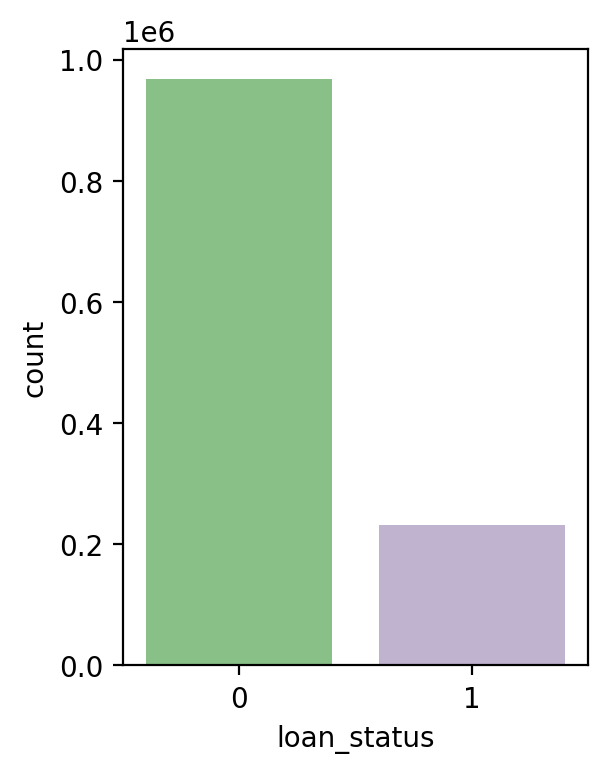

In [27]:
plt.figure(dpi = 200, figsize = (3,4));
sns.countplot(x = y['loan_status'], palette = 'Accent')

In [28]:
y['loan_status'].sum()/y.shape[0]

0.19302902586216236

В целом, такое соотношение дефолтных и недефолтных займов будет приемлемым для обучения модели.

Для решения задачи классификации была выбрана модель градиентного бустинга CatBoostClassifier из библиотеки CatBoost.

In [29]:
cat_features = []
for num, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        cat_features.append(num)
        df[col] = df[col].astype('category')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 17)

In [31]:
from catboost import CatBoostClassifier

Были выбраны следующие параметры модели: метрика лучшей модели - AUC, скорость обучения - 0.25, максимальное количество деревьев - 800, метод сэмплирования - MVS, добавлена балансировка весов классов и максимальная глубина дерева - 5.

In [32]:
model = CatBoostClassifier(
    iterations = 800,
    learning_rate = 0.25,
    eval_metric = 'AUC',
    bootstrap_type = 'MVS',
    custom_loss = 'Accuracy',
    auto_class_weights = 'Balanced',
    depth = 5
)

In [33]:
model.fit(X_train, y_train,
          cat_features = cat_features,
          eval_set = (X_test, y_test),
          verbose = 0,
          plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
model.best_score_

{'learn': {'Accuracy:use_weights=true': 0.680872015000683,
  'Logloss': 0.5913570746983555,
  'Accuracy:use_weights=false': 0.6699237133221098},
 'validation': {'Accuracy:use_weights=true': 0.6674959198303662,
  'Logloss': 0.60550840946509,
  'Accuracy:use_weights=false': 0.6636752165245394,
  'AUC': 0.7310164275685487}}

In [37]:
for key,value in model.get_all_params().items():
    print('{}, {}'.format(key,value))

nan_mode, Min
eval_metric, AUC
combinations_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
iterations, 800
sampling_frequency, PerTree
fold_permutation_block, 0
leaf_estimation_method, Newton
counter_calc_method, SkipTest
grow_policy, SymmetricTree
penalties_coefficient, 1
boosting_type, Plain
model_shrink_mode, Constant
feature_border_type, GreedyLogSum
ctr_leaf_count_limit, 18446744073709551615
bayesian_matrix_reg, 0.10000000149011612
one_hot_max_size, 2
eval_fraction, 0
force_unit_auto_pair_weights, False
l2_leaf_reg, 3
random_strength, 1
rsm, 1
boost_from_average, False
max_ctr_complexity, 4
model_size_reg, 0.5
simple_ctr, ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1']
pool_metainfo_options

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
def compute_gini(model, y_test, X_test):
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return 2*auc - 1

In [40]:
print(compute_gini(model, y_test, X_test))

0.46203285513709735


После обучения на Train-датасете проделаем все те же операции с Test-датасетом и сделаем предсказание.

In [41]:
df2 = pd.read_csv('X_test.csv')

In [42]:
df2 = df2.drop('index', axis = 1)

In [43]:
df2.isna().sum()

acc_now_delinq                     0
addr_state                         0
annual_inc                         0
chargeoff_within_12_mths          19
collections_12_mths_ex_med        19
delinq_2yrs                        0
dti                                0
earliest_cr_line                   0
emp_length                     35630
fico_range_high                    0
fico_range_low                     0
funded_amnt                        0
home_ownership                     0
inq_last_12m                  278909
installment                        0
int_rate                           0
issue_d                            0
loan_amnt                          0
mort_acc                       15740
mths_since_last_delinq        299829
mths_since_recent_bc_dlq      451967
mths_since_recent_inq          74110
num_accts_ever_120_pd          22518
num_actv_bc_tl                 22518
num_rev_accts                  22518
num_sats                       18546
num_tl_120dpd_2m               45008
n

In [46]:
df2['emp_length'].fillna(value = 'No info', inplace = True)

In [47]:
val1 = df2[df2['collections_12_mths_ex_med'] != 0]['collections_12_mths_ex_med'].median()
val2 = df2[df2['chargeoff_within_12_mths'] != 0]['chargeoff_within_12_mths'].median()

In [48]:
df2['collections_12_mths_ex_med'].fillna(value = val1, inplace = True)
df2['chargeoff_within_12_mths'].fillna(value = val2, inplace = True)

In [49]:
df2['revol_util'] = df2['revol_util'].apply(make_ints)
val3 = df2['revol_util'].median()
df2['revol_util'].fillna(value = val3, inplace = True)

In [50]:
df2['int_rate'] = df2['int_rate'].apply(lambda x: float(x[:len(x)-1]))

In [51]:
df2 = df2.drop(['mths_since_recent_bc_dlq', 'title'], axis = 1)

In [52]:
df2.fillna(value = -999, inplace = True)

In [53]:
df2.isna().sum()

acc_now_delinq                0
addr_state                    0
annual_inc                    0
chargeoff_within_12_mths      0
collections_12_mths_ex_med    0
delinq_2yrs                   0
dti                           0
earliest_cr_line              0
emp_length                    0
fico_range_high               0
fico_range_low                0
funded_amnt                   0
home_ownership                0
inq_last_12m                  0
installment                   0
int_rate                      0
issue_d                       0
loan_amnt                     0
mort_acc                      0
mths_since_last_delinq        0
mths_since_recent_inq         0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_rev_accts                 0
num_sats                      0
num_tl_120dpd_2m              0
num_tl_30dpd                  0
num_tl_90g_dpd_24m            0
num_tl_op_past_12m            0
open_acc                      0
open_il_24m                   0
open_rv_

In [54]:
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype('category')

In [55]:
y_pred = model.predict_proba(df2)

In [56]:
answer = pd.DataFrame(data = {'loan_status' : y_pred[:, 1]})

In [57]:
answer.index.name = 'index'

In [58]:
answer

,loan_status
index,
0,0.847100
1,0.628585
2,0.401442
3,0.116841
4,0.275672
...,...
590972,0.327451
590973,0.577423
590974,0.581073


In [89]:
# Выгружаем ответ
compression_opts = dict(method='zip',
                        archive_name='answer.csv')  
answer.to_csv('answer.zip',
          compression=compression_opts)  